<a href="https://colab.research.google.com/github/101nazrin/Data-Analysis-on-Climate-Change/blob/main/Thanikattil_Rafeeque_Nazrin_21031314.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Modules





In [1]:
import os
import cv2
import time
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import albumentations as A
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive' , force_remount=True)


Mounted at /content/drive


Loading The Data

In [3]:
data_dir = "/content/drive/MyDrive/Cloud_class_seg"
train_csv_path = os.path.join(data_dir,'train.csv')

train_image_path = os.path.join(data_dir,'Train_C_img')


In [4]:
Train_img = []
Test_img = []
train_path = '/content/drive/MyDrive/Cloud_class_seg/Train_C_img'
test_path ='/content/drive/MyDrive/Cloud_class_seg/Test_images'
def image_load(path,img_file):
  i=0
  for image_file in os.listdir(path):
    i=i+1
    image_path = os.path.join(path, image_file)
    image = Image.open(image_path)
    img_file.append(image)
    if i == 12:
      break

image_load(train_path ,Train_img)
Train_img

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2100x1400 at 0x7EF0912FA560>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2100x1400 at 0x7EEFF31CDF60>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2100x1400 at 0x7EEFF31CDFC0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2100x1400 at 0x7EEFF31CE050>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2100x1400 at 0x7EEFF31CE0B0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2100x1400 at 0x7EEFF31CE110>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2100x1400 at 0x7EEFF31CE170>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2100x1400 at 0x7EF0912FA2C0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2100x1400 at 0x7EEFF31CE290>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2100x1400 at 0x7EEFF31CE3B0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2100x1400 at 0x7EEFF31CE260>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB siz

In [5]:
#image_load(test_path ,Test_img)
#Test_img
test_df1 = []
image_ = os.listdir(test_path)
for image_id in image_:
    path1 = os.path.join(test_path,image_id)
    img1 = cv2.imread(path1)
    img1 =  cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    test_df1.append(img1)
test_images_array = np.array(test_df1)


Exploratory data analysis (EDA)

In [6]:
# loading the csv data

train_df = pd.read_csv(train_csv_path).fillna(-1)
train_df_1 = pd.read_csv(train_csv_path)
train_df.head()


Image_Label                                      EncodedPixels
0    0011165.jpg_Fish  264918 937 266318 937 267718 937 269118 937 27...
1  0011165.jpg_Flower  1355565 1002 1356965 1002 1358365 1002 1359765...
2  0011165.jpg_Gravel                                                 -1
3   0011165.jpg_Sugar                                                 -1
4    002be4f.jpg_Fish  233813 878 235213 878 236613 878 238010 881 23...

In [7]:
train_df_1 = train_df_1[~train_df_1['EncodedPixels'].isnull()]

# splitting the Image _Label as Image and Class columns

train_df['Image'] = train_df['Image_Label'].map(lambda x: x.split('_')[0])
train_df['Class'] = train_df['Image_Label'].map(lambda x: x.split('_')[1])


In [8]:
#Splitting the Image label
train_df_1['Image'] = train_df_1['Image_Label'].map(lambda x: x.split('_')[0])
train_df_1['Class'] = train_df_1['Image_Label'].map(lambda x: x.split('_')[1])

In [9]:
Classes = ["Fish","Flower","Gravel","Sugar"]

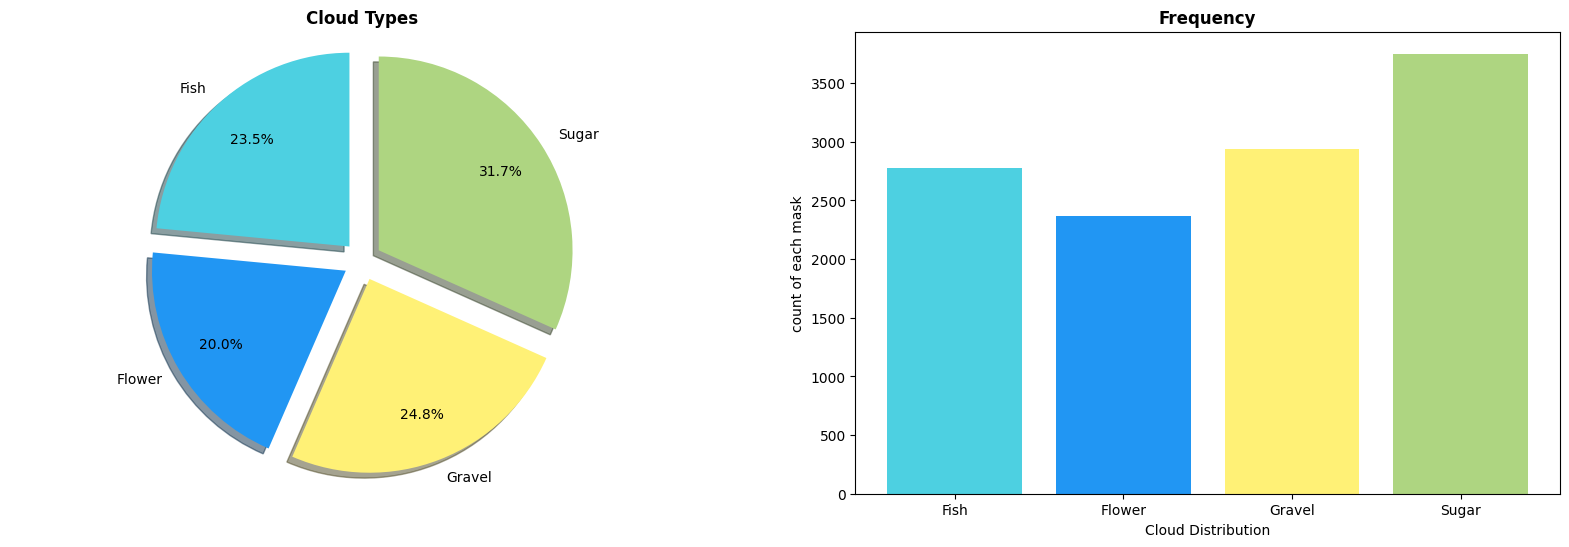

In [10]:
# Explore the Labels
fish_label = train_df_1[train_df_1['Class'] == 'Fish'].EncodedPixels.count()
flower_label = train_df_1[train_df_1['Class'] == 'Flower'].EncodedPixels.count()
gravel_label = train_df_1[train_df_1['Class'] == 'Gravel'].EncodedPixels.count()
sugar_label = train_df_1[train_df_1['Class'] == 'Sugar'].EncodedPixels.count()

# Plotting a chart for Cloud types
sizes = [fish_label, flower_label, gravel_label, sugar_label]
explode = (0.1, 0.1, 0.1, 0.1)

figure, axis = plt.subplots(1,2, figsize=(20,6))
colors = ['#4DD0E1','#2196F3','#FFF176','#AED581']
#axis[0].pie(sizes, explode=explode, labels=Classes, autopct='%1.1f%%', shadow=True, startangle=90)
axis[0].pie(sizes, explode=explode, labels=Classes, autopct='%1.1f%%', shadow=True, startangle=90,colors=colors, pctdistance=0.75)
axis[0].axis('equal')
axis[0].set_title('Cloud Types', fontweight='bold')

axis[1].bar(Classes, sizes, color=colors)
axis[1].set_title('Frequency', fontweight='bold')
axis[1].set_xlabel('Cloud Distribution')
axis[1].set_ylabel('count of each mask')

plt.show()

In [11]:
train_df

Image_Label                                      EncodedPixels  \
0        0011165.jpg_Fish  264918 937 266318 937 267718 937 269118 937 27...   
1      0011165.jpg_Flower  1355565 1002 1356965 1002 1358365 1002 1359765...   
2      0011165.jpg_Gravel                                                 -1   
3       0011165.jpg_Sugar                                                 -1   
4        002be4f.jpg_Fish  233813 878 235213 878 236613 878 238010 881 23...   
...                   ...                                                ...   
22179   ffd6680.jpg_Sugar                                                 -1   
22180    ffea4f4.jpg_Fish                                                 -1   
22181  ffea4f4.jpg_Flower  1194860 675 1196260 675 1197660 675 1199060 67...   
22182  ffea4f4.jpg_Gravel                                                 -1   
22183   ffea4f4.jpg_Sugar                                                 -1   

             Image   Class  
0      0011165.jpg    Fish  
1      0011165.jpg  Flower  
2      0011165.jpg  Gravel  
3      0011165.jpg   Sugar  
4      002be4f.jpg    Fish  
...            ...     ...  
22179  ffd6680.jpg   Sugar  
22180  ffea4f4.jpg    Fish  
22181  ffea4f4.jpg  Flower  
22182  ffea4f4.jpg  Gravel  
22183  ffea4f4.jpg   Sugar  

[22184 rows x 4 columns]

In [12]:
train_df['Label_EncodedPixels'] = train_df.apply(lambda row: (row['Class'], row['EncodedPixels']), axis = 1)
train_df.head()
grouped_EncodedPixels = train_df.groupby('Image')['Label_EncodedPixels'].apply(list)
grouped_EncodedPixels.head()
grouped_EncodedPixels.info()

<class 'pandas.core.series.Series'>
Index: 5546 entries, 0011165.jpg to ffea4f4.jpg
Series name: Label_EncodedPixels
Non-Null Count  Dtype 
--------------  ----- 
5546 non-null   object
dtypes: object(1)
memory usage: 86.7+ KB


In [13]:
train_df = grouped_EncodedPixels.to_frame().reset_index()
train_df.head()

Image                                Label_EncodedPixels
0  0011165.jpg  [(Fish, 264918 937 266318 937 267718 937 26911...
1  002be4f.jpg  [(Fish, 233813 878 235213 878 236613 878 23801...
2  0031ae9.jpg  [(Fish, 3510 690 4910 690 6310 690 7710 690 91...
3  0035239.jpg  [(Fish, -1), (Flower, 100812 462 102212 462 10...
4  003994e.jpg  [(Fish, 2367966 18 2367985 2 2367993 8 2368002...

In [14]:
#Aggregarting the train data wrt to imageid
labels = ['Fish', 'Flower', 'Gravel', 'Sugar']

for label in labels:
    train_df = train_df.assign(**{label: 0})
for index, row in train_df.iterrows():
    for item in row['Label_EncodedPixels']:
        label, value = item
        if value == -1:
            bool_value = 0
        else:
            bool_value = 1
        train_df.loc[index, label] = bool_value

train_df['classes'] = train_df.apply(lambda row: [col for col in labels if row[col] == 1], axis=1)

train_df.head()


Image                                Label_EncodedPixels  Fish  \
0  0011165.jpg  [(Fish, 264918 937 266318 937 267718 937 26911...     1   
1  002be4f.jpg  [(Fish, 233813 878 235213 878 236613 878 23801...     1   
2  0031ae9.jpg  [(Fish, 3510 690 4910 690 6310 690 7710 690 91...     1   
3  0035239.jpg  [(Fish, -1), (Flower, 100812 462 102212 462 10...     0   
4  003994e.jpg  [(Fish, 2367966 18 2367985 2 2367993 8 2368002...     1   

   Flower  Gravel  Sugar                classes  
0       1       0      0         [Fish, Flower]  
1       1       0      1  [Fish, Flower, Sugar]  
2       1       0      1  [Fish, Flower, Sugar]  
3       1       1      0       [Flower, Gravel]  
4       0       1      1  [Fish, Gravel, Sugar]

Plotting the Image

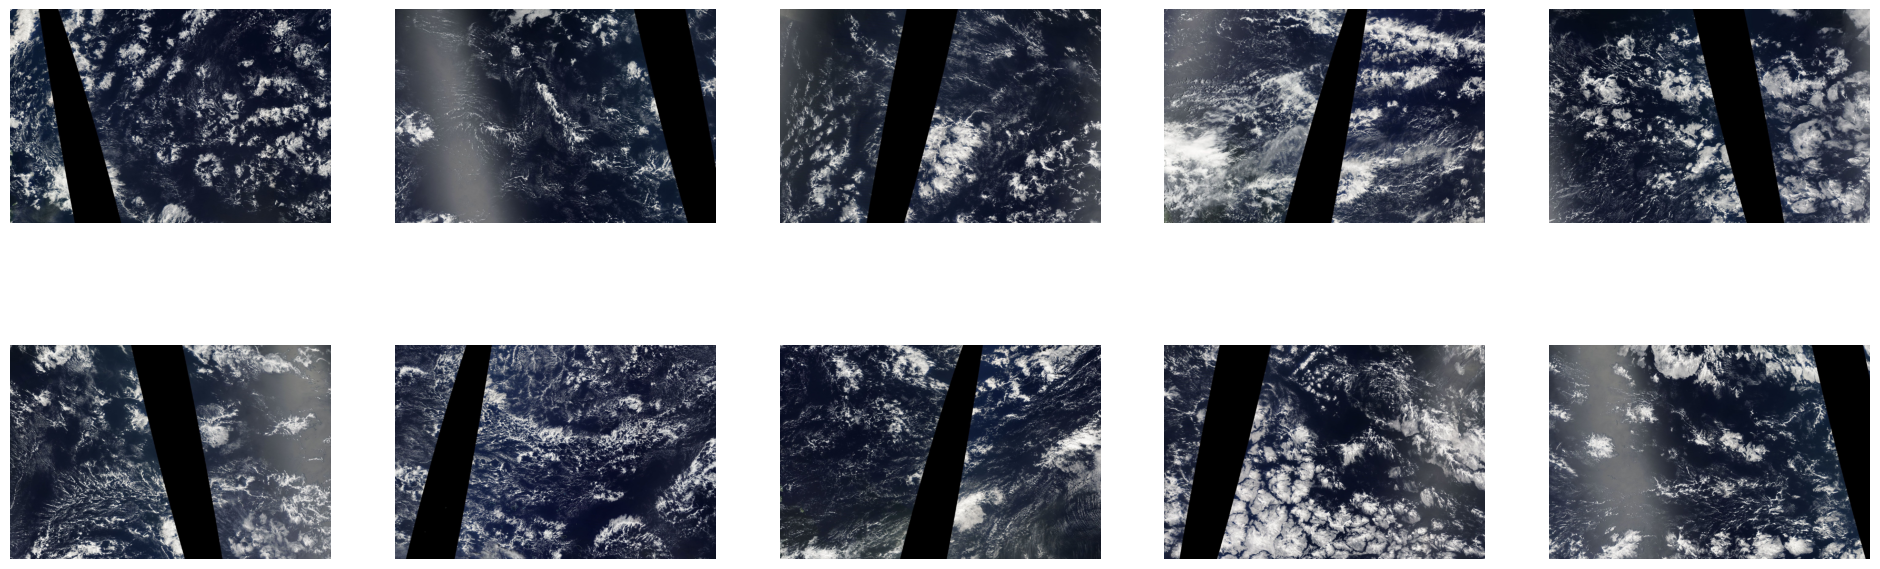

In [15]:
plt.figure(figsize=(24,8))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(Train_img[i])
    plt.axis('off')

plt.show()


In [16]:
#Defining the image
img_width = 2100
img_height = 1400
BATCH_SIZE = 32
IMG_SIZE = (img_height,img_width)

Segmentation

In [17]:
def rle_to_mask(rle_string, height, width):
    '''
    convert RLE(run length encoding) string to numpy array


    '''

    rows, cols = height, width

    if rle_string == -1:
        return np.zeros((height,width))
    else:
        rle_numbers = [int(num_string) for num_string in rle_string.split(' ')]
        rle_pairs = np.array(rle_numbers).reshape(-1,2)
        img = np.zeros(rows*cols, dtype=np.uint8)
        for index, length in rle_pairs:
            index -= 1
            img[index:index+length] = 255
        img = img.reshape(cols,rows)
        img = img.T
        img = img/255.0
        return img





In [18]:
def get_masks_by_img_id(dataframe, image_id):
    masks = np.zeros((img_height,img_width,4))
    rle_masks = list(dataframe[dataframe['Image'] == image_id]['Label_EncodedPixels'])[0]
    fish_mask = rle_to_mask(rle_masks[0][1], img_height, img_width)
    flower_mask = rle_to_mask(rle_masks[1][1], img_height, img_width)
    gravel_mask = rle_to_mask(rle_masks[2][1], img_height, img_width)
    sugar_mask = rle_to_mask(rle_masks[3][1], img_height, img_width)
    mask_list = [fish_mask,flower_mask,gravel_mask,sugar_mask]
    for ix, mask in enumerate(mask_list):
        masks[:,:,ix] = mask
    return masks

In [19]:
def draw_label_on_mask(mask, label, obj=plt):
    '''
    Function to add labels to the image.
    '''
    if np.sum(mask) > 0:
        y,x = 0,0
        y,x = np.argwhere(mask==1)[0]
        y,x = y+50,x+20
        obj.text(x,y,label,color='white',)
    return None

In [20]:
def show_img_with_masks(img,masks,comment=""):

    colormaps = ['PuRd_r', 'Blues_r', 'Purples_r','winter_r']
    mask_labels = ['Fish', 'Flower', 'Gravel', 'Sugar']

    fig, axes = plt.subplots(1,6,figsize=(36,4))
    axes = axes.ravel()

    if img.shape[-1]!=3:
        img_cmap = 'gray'
    else:
        img_cmap=None

    for ix,axis in enumerate(axes):
        ix = ix%6
        axis.imshow(img,cmap=img_cmap)
        axis.axis('off')
        if ix==0:
            axis.set_title("Main Image")
        elif ix==1:
            for i,(mask,cmap,label) in enumerate(zip(masks,colormaps,mask_labels)):
                mask = np.clip(mask,0,1)
                mask = np.ma.masked_where(mask == 0, mask)
                axis.imshow(mask,alpha=0.7,cmap=cmap)
                axis.set_title(f"All the mask {comment}")
                draw_label_on_mask(mask,label,axis)
        elif ix>=2:
            for i,(mask,cmap,label) in enumerate(zip(masks,colormaps,mask_labels)):
                mask = np.clip(mask,0,1)
                mask = np.ma.masked_where(mask == 0, mask)
                axis = axes[2+i]
                axis.imshow(mask,alpha=0.4,cmap=cmap)
                axis.set_title(f"{label} {comment}")
                draw_label_on_mask(mask,label,axis)
    plt.show()

    return None

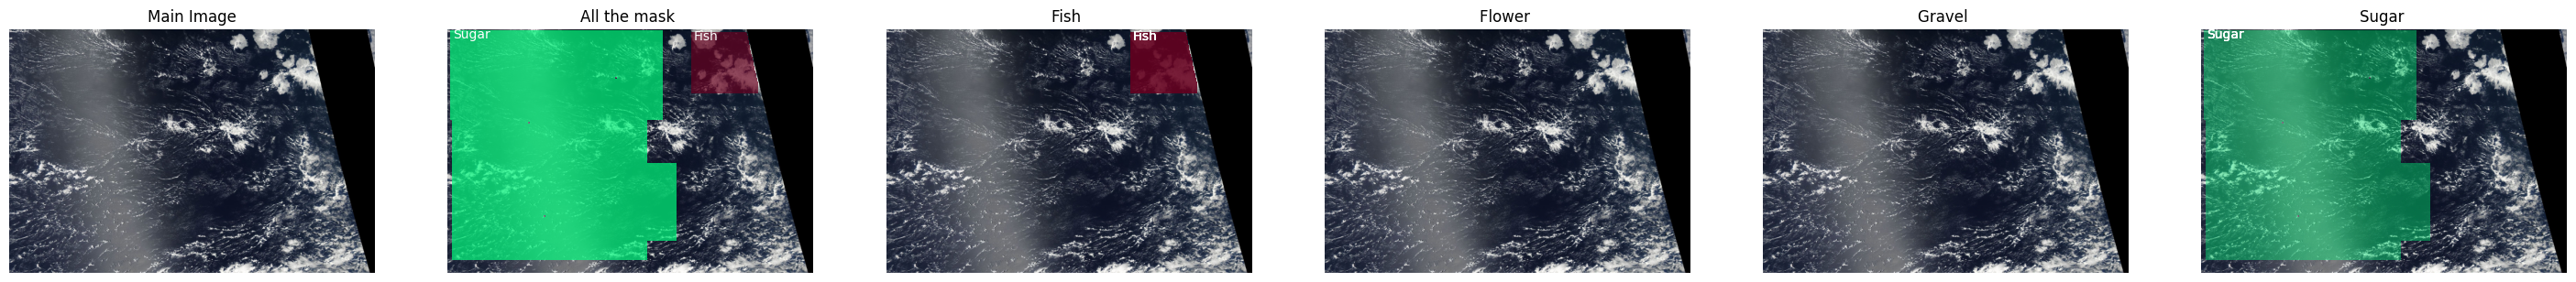

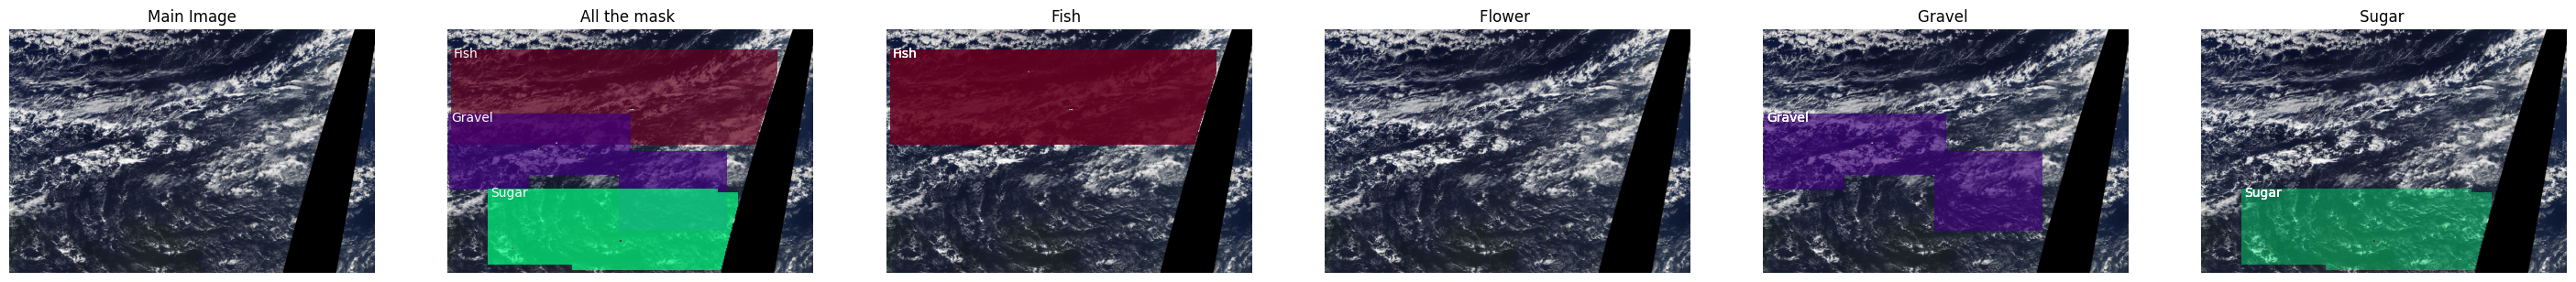

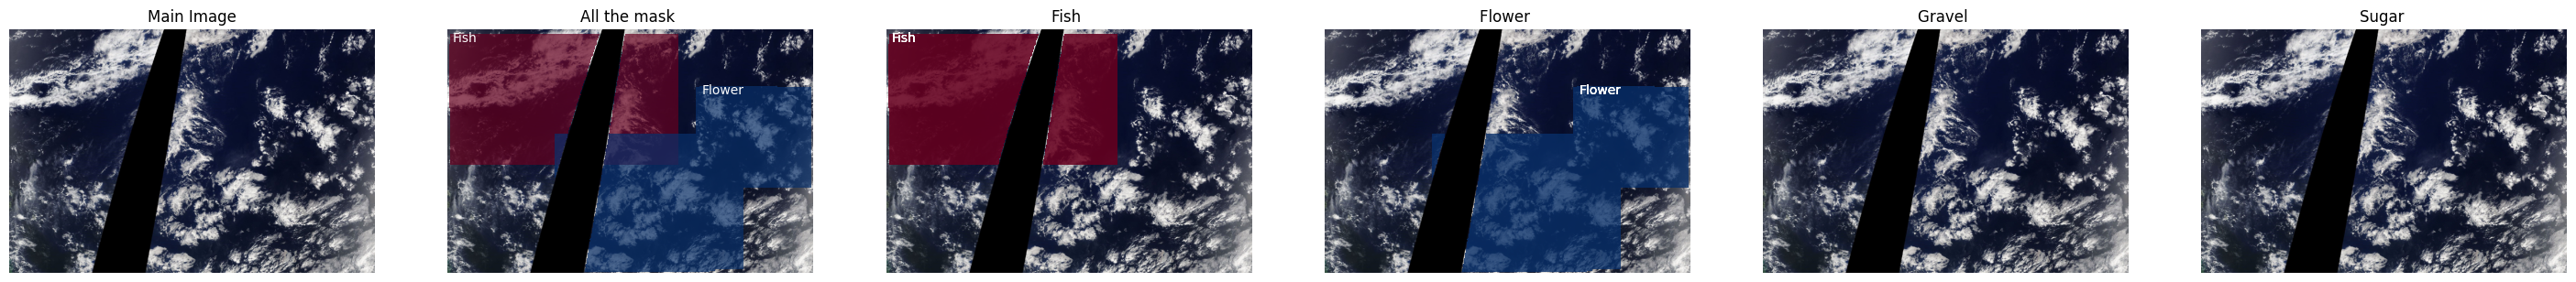

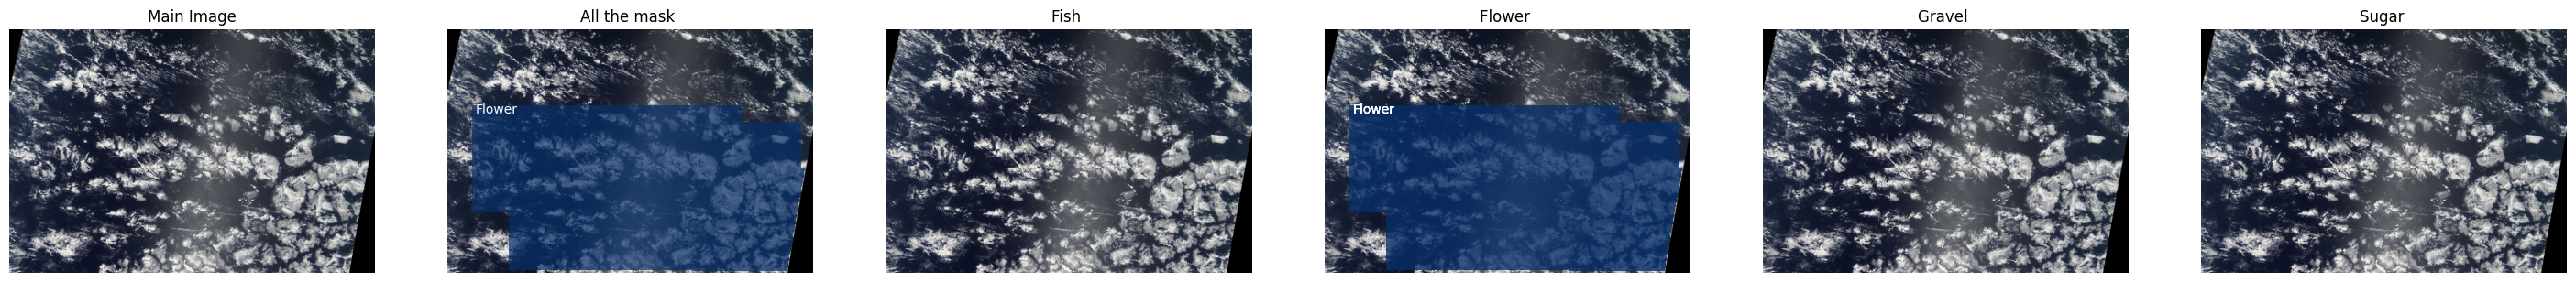

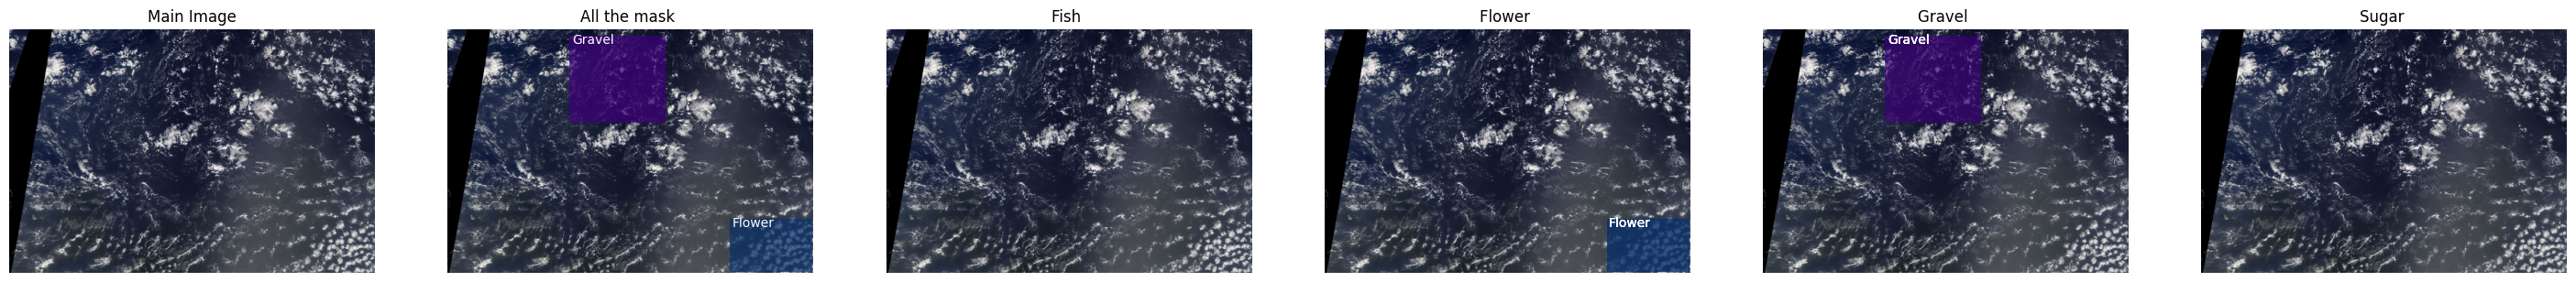

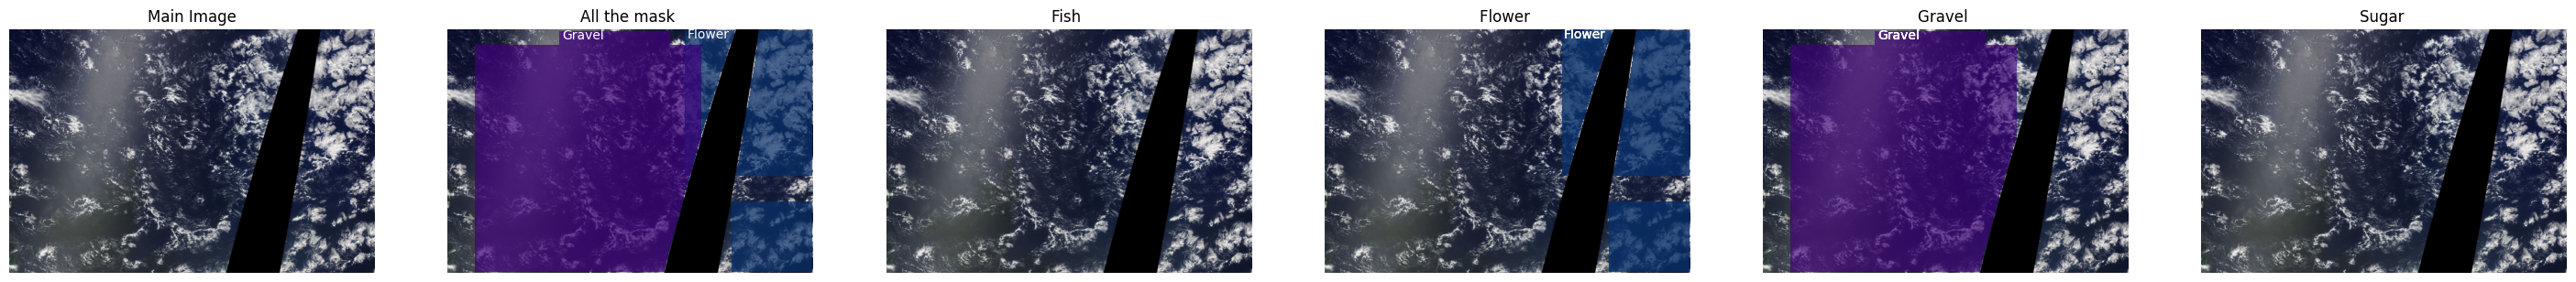

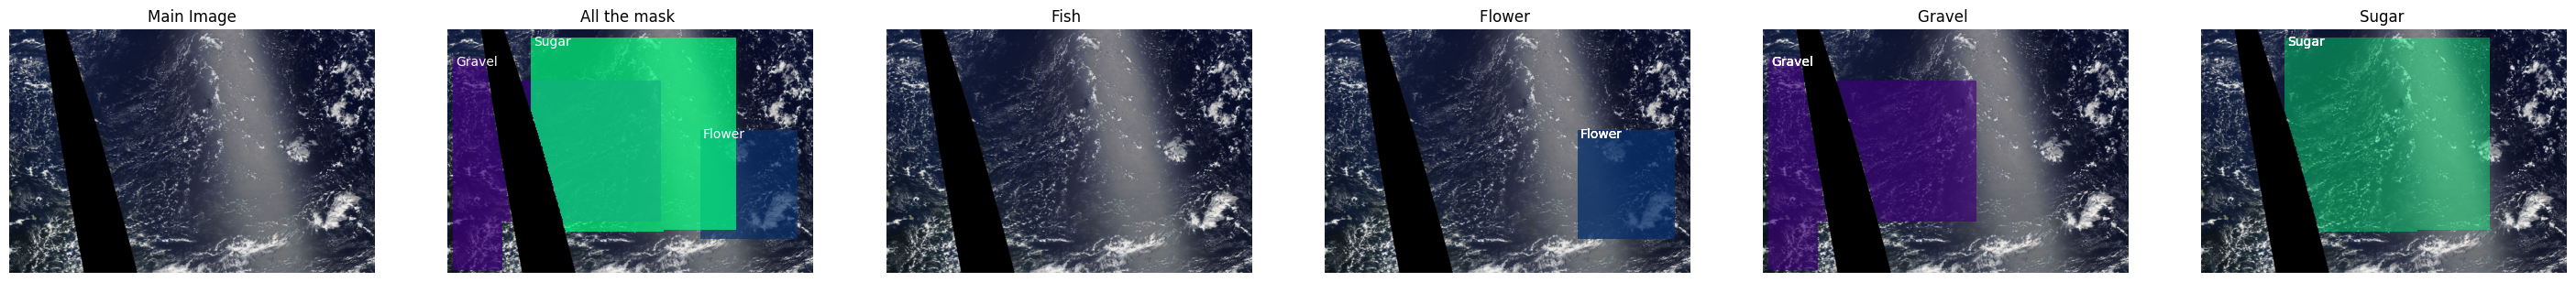

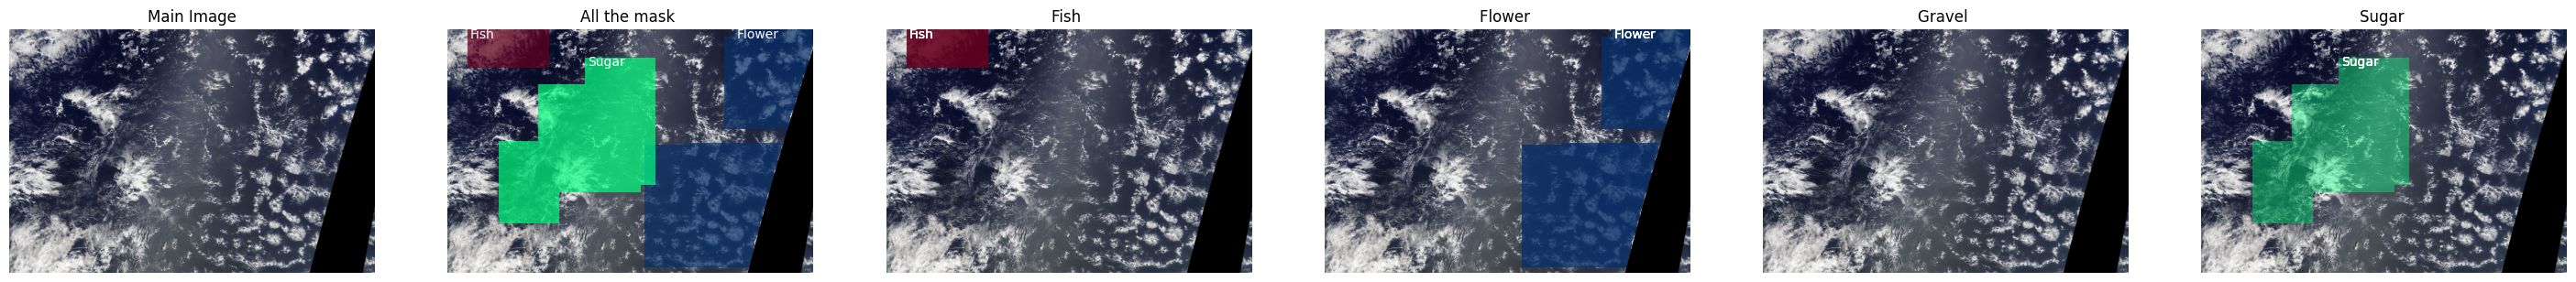

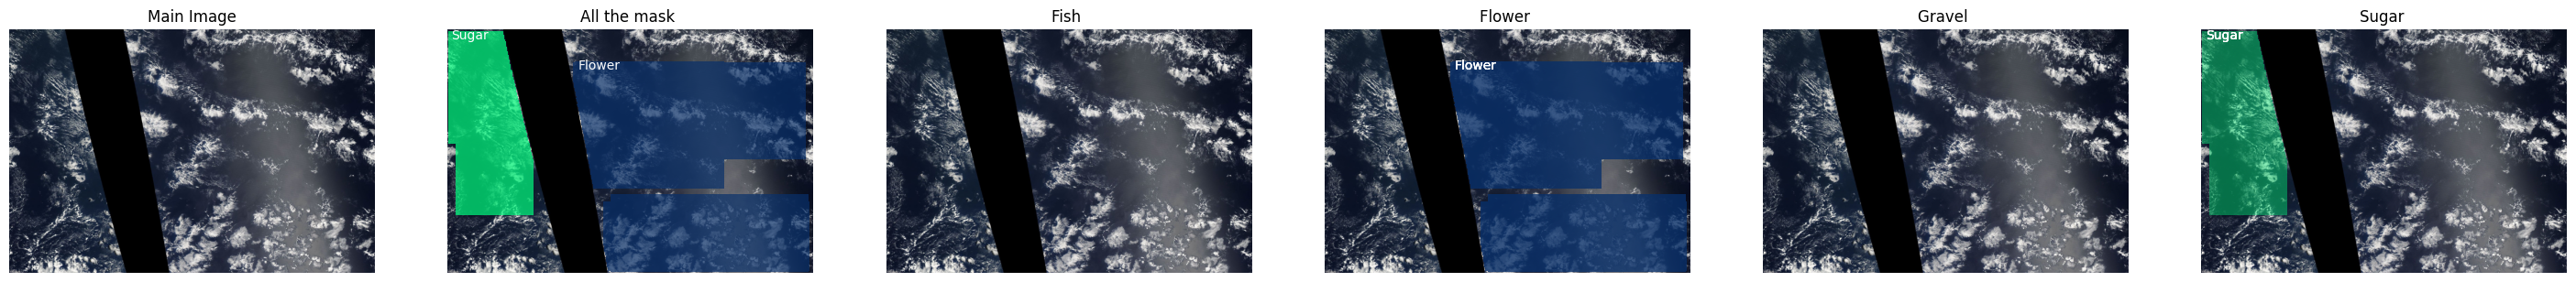

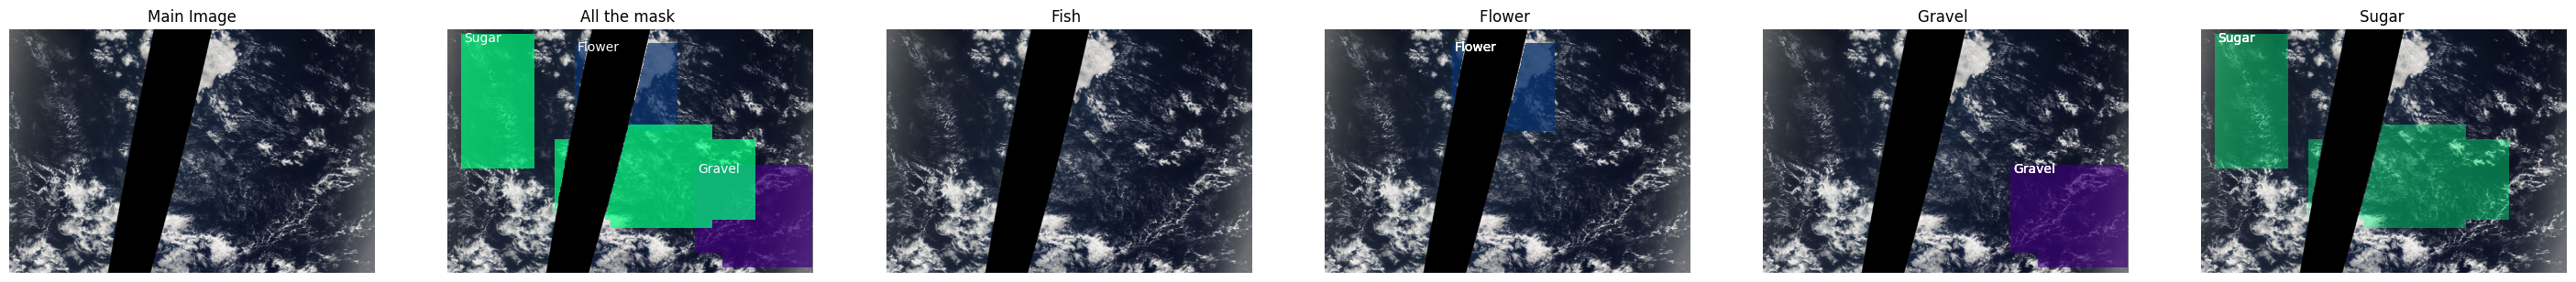

Test images shape: (10, 1400, 2100, 3)


In [21]:
image_ids = os.listdir(train_image_path)[10:20]
train_df1 = []
masks_df1 = []
i=0
for image_id in image_ids:
    path = os.path.join(train_image_path,image_id)
    img = cv2.imread(path)
    img =  cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    train_df1.append(img)
    masks = get_masks_by_img_id(train_df, image_id)
    masks = (masks[:,:,0], masks[:,:,1],masks[:,:,2],masks[:,:,3])
    masks_df1.append(masks)
    show_img_with_masks(img,masks)
train_images_array = np.array(train_df1)
masks_images_array = np.array(masks_df1)

# Print the shape of the test images array
print("Test images shape:", train_images_array.shape)

Image Preprocessing

In [22]:
'''#import imgaug.augmenters as iaa
#import numpy as np
# Convert Train_img list to a NumPy array
Train_img_array = np.array([np.array(image) for image in Train_img])
Mask_img_array = np.array([np.array(image) for image in masks_df1])
# Define the augmentation sequence
augmentation = iaa.Sequential([
    iaa.Fliplr(0.5),  # Flip horizontally with a 50% chance
    iaa.Affine(rotate=(-10, 10)),  # Rotate image by -15 to +15 degrees
    iaa.GaussianBlur(sigma=(0, 0.5)),  # Apply Gaussian blur
    iaa.AdditiveGaussianNoise(scale=(0, 0.1 * 255)),  # Add Gaussian noise
])

# Perform data augmentation
augmented_images = augmentation(images=Train_img_array)
augmented_mask = augmentation(images=Mask_img_array)
# Display the augmented images
plt.figure(figsize=(24,8))
for i, image in enumerate(augmented_images):
    plt.subplot(2, 5, i+1)
    plt.imshow(image)
    plt.axis('off')

plt.show()




print(augmented_mask.shape)
augmented_image.shape
'''

"#import imgaug.augmenters as iaa\n#import numpy as np\n# Convert Train_img list to a NumPy array\nTrain_img_array = np.array([np.array(image) for image in Train_img])\nMask_img_array = np.array([np.array(image) for image in masks_df1])\n# Define the augmentation sequence\naugmentation = iaa.Sequential([\n    iaa.Fliplr(0.5),  # Flip horizontally with a 50% chance\n    iaa.Affine(rotate=(-10, 10)),  # Rotate image by -15 to +15 degrees\n    iaa.GaussianBlur(sigma=(0, 0.5)),  # Apply Gaussian blur\n    iaa.AdditiveGaussianNoise(scale=(0, 0.1 * 255)),  # Add Gaussian noise\n])\n\n# Perform data augmentation\naugmented_images = augmentation(images=Train_img_array)\naugmented_mask = augmentation(images=Mask_img_array)\n# Display the augmented images\nplt.figure(figsize=(24,8))\nfor i, image in enumerate(augmented_images):\n    plt.subplot(2, 5, i+1)\n    plt.imshow(image)\n    plt.axis('off')\n\nplt.show()\n\n\n\n\nprint(augmented_mask.shape)\naugmented_image.shape\n"

In [23]:
image_shape = train_df1[0].shape  # Accessing the shape of the first image
print("Image shape:", image_shape)
image_shape = masks_df1[0][0].shape  # Accessing the shape of the first mask in the first image
print("Mask shape:", image_shape)

Image shape: (1400, 2100, 3)
Mask shape: (1400, 2100)


Splitting the dataset

In [24]:
train_images, val_images, train_masks, val_masks = train_test_split(train_images_array, masks_images_array, test_size=0.2, random_state=42)

train_images = np.array(train_images)
train_masks = np.array(train_masks)
val_images = np.array(val_images)
val_masks = np.array(val_masks)
#print(train_images[0])

In [25]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
train_images, test_images, train_masks, test_masks = train_test_split(train_images_array,masks_images_array, test_size=0.2, random_state=42)

# Split the train set into train and validation sets
train_images, val_images, train_masks, val_masks = train_test_split(train_images, train_masks, test_size=0.2, random_state=42)
train_images = np.array(train_images)
train_masks = np.array(train_masks)

test_images = np.array(test_images)
test_masks = np.array(test_masks)

val_images = np.array(val_images)
val_masks = np.array(val_masks)

In [26]:
import cv2
import numpy as np

# Assuming train_images, train_masks, val_images, val_masks, test_images_array have appropriate shapes
target_size = (256, 256)

# Function to resize images and masks
def resize_image_and_mask(image, mask):
    resized_image = cv2.resize(image, target_size, interpolation=cv2.INTER_LINEAR)
    resized_mask = cv2.resize(mask, target_size, interpolation=cv2.INTER_NEAREST)
    resized_mask = np.expand_dims(resized_mask, axis=-1)
    resized_mask = np.repeat(resized_mask, 3, axis=-1)
    return np.expand_dims(resized_image, axis=0), np.expand_dims(resized_mask, axis=0)

# Preprocess the entire train dataset
preprocessed_train_images = []
preprocessed_train_masks = []

for image, masks in zip(train_images, train_masks):
    # Convert the masks to a single mask by stacking along the channel axis
    merged_mask = np.max(masks, axis=0)

    # Resize and augment the image and mask
    resized_image, resized_mask = resize_image_and_mask(image, merged_mask)

    # Append the preprocessed image and mask to the lists
    preprocessed_train_images.append(resized_image)
    preprocessed_train_masks.append(resized_mask)

# Preprocess the validation dataset
preprocessed_val_images = []
preprocessed_val_masks = []

for image, masks in zip(val_images, val_masks):
    # Convert the masks to a single mask by stacking along the channel axis
    merged_mask = np.max(masks, axis=0)

    # Resize and augment the image and mask
    resized_image, resized_mask = resize_image_and_mask(image, merged_mask)

    # Append the preprocessed image and mask to the lists
    preprocessed_val_images.append(resized_image)
    preprocessed_val_masks.append(resized_mask)

preprocessed_test_images = []
preprocessed_test_masks = []
for image, masks in zip(test_images, test_masks):
    # Convert the masks to a single mask by stacking along the channel axis
    merged_mask = np.max(masks, axis=0)

    # Resize and augment the image and mask
    resized_image, resized_mask = resize_image_and_mask(image, merged_mask)

    # Append the preprocessed image and mask to the lists
    preprocessed_test_images.append(resized_image)
    preprocessed_test_masks.append(resized_mask)


# Preprocess the test dataset
preprocessed_REAL_test_images = []

for image in test_images_array:
    # Resize the test image
    resized_image, _ = resize_image_and_mask(image, np.zeros_like(image))  # Use dummy mask since it's not available for the test image

    # Append the preprocessed test image to the list
    preprocessed_REAL_test_images.append(resized_image)

# Convert the preprocessed datasets to numpy arrays
preprocessed_train_images_array = np.concatenate(preprocessed_train_images, axis=0)
preprocessed_train_masks_array = np.concatenate(preprocessed_train_masks, axis=0)
preprocessed_test_images_array = np.concatenate(preprocessed_test_images, axis=0)
preprocessed_test_masks_array = np.concatenate(preprocessed_test_masks, axis=0)
preprocessed_val_images_array = np.concatenate(preprocessed_val_images, axis=0)
preprocessed_val_masks_array = np.concatenate(preprocessed_val_masks, axis=0)
preprocessed_REAL_test_images_array = np.concatenate(preprocessed_REAL_test_images, axis=0)

# Print the shapes of the preprocessed datasets
print("Preprocessed Train images shape:", preprocessed_train_images_array.shape)
print("Preprocessed Train masks shape:", preprocessed_train_masks_array.shape)

print("Preprocessed Test images shape:", preprocessed_test_images_array.shape)
print("Preprocessed Test masks shape:", preprocessed_test_masks_array.shape)

print("Preprocessed Validation images shape:", preprocessed_val_images_array.shape)
print("Preprocessed Validation masks shape:", preprocessed_val_masks_array.shape)
print("Preprocessed Test images shape:", preprocessed_REAL_test_images_array.shape)


Preprocessed Train images shape: (6, 256, 256, 3)
Preprocessed Train masks shape: (6, 256, 256, 3)
Preprocessed Test images shape: (2, 256, 256, 3)
Preprocessed Test masks shape: (2, 256, 256, 3)
Preprocessed Validation images shape: (2, 256, 256, 3)
Preprocessed Validation masks shape: (2, 256, 256, 3)
Preprocessed Test images shape: (10, 256, 256, 3)


Defining the Model

In [27]:
def categorical_cross_entropy(y_true, y_pred):
    return K.categorical_crossentropy(y_true, y_pred)

In [28]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout, BatchNormalization

# Define U-Net model
def unet(input_shape):
    inputs = Input(shape=input_shape)

    # Downsample path
    conv1 = Conv2D(32, 3, activation='relu', padding='same')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, 3, activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, 3, activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, 3, activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, 3, activation='relu', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, 3, activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # Upsample path
    up4 = UpSampling2D(size=(2, 2))(conv3)
    conv4 = Conv2D(64, 3, activation='relu', padding='same')(up4)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(64, 3, activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)

    up5 = UpSampling2D(size=(2, 2))(conv4)
    conv5 = Conv2D(32, 3, activation='relu', padding='same')(up5)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(32, 3, activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)

    # Output
    outputs = Conv2D(3, 1, activation='softmax')(conv5)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define input shape
input_shape = (256, 256, 3)

# Create the U-Net model
model = unet(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(preprocessed_train_images_array, preprocessed_train_masks_array,
                    validation_data=(preprocessed_val_images_array,preprocessed_val_masks_array),
                    batch_size=8,
                    epochs=10)


Epoch 1/10
1/1 [==============================] - 20s 20s/step - loss: 2.6977 - accuracy: 0.3355 - val_loss: 1.2991 - val_accuracy: 0.0154
Epoch 2/10
1/1 [==============================] - 9s 9s/step - loss: 2.5300 - accuracy: 0.3550 - val_loss: 1.4590 - val_accuracy: 0.0157
Epoch 3/10
1/1 [==============================] - 11s 11s/step - loss: 2.3242 - accuracy: 0.3652 - val_loss: 1.6976 - val_accuracy: 0.0146
Epoch 4/10
1/1 [==============================] - 11s 11s/step - loss: 2.1810 - accuracy: 0.3523 - val_loss: 1.6496 - val_accuracy: 0.0153
Epoch 5/10
1/1 [==============================] - 10s 10s/step - loss: 2.1094 - accuracy: 0.3317 - val_loss: 1.5355 - val_accuracy: 0.0156
Epoch 6/10
1/1 [==============================] - 10s 10s/step - loss: 2.0739 - accuracy: 0.3371 - val_loss: 1.8011 - val_accuracy: 0.0157
Epoch 7/10
1/1 [==============================] - 12s 12s/step - loss: 2.0582 - accuracy: 0.3370 - val_loss: 2.0253 - val_accuracy: 0.0138
Epoch 8/10
1/1 [=============

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 256, 256, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0     

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


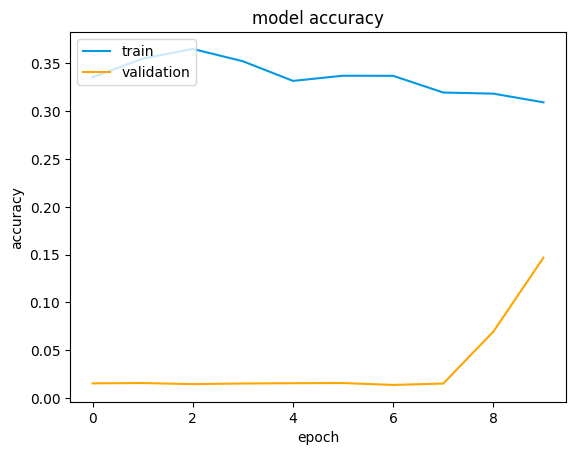

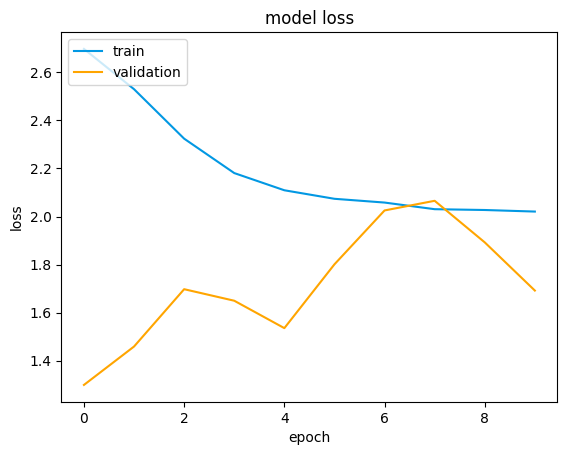

In [30]:
### Plot the losses and metrics. Comment on the figures in your report, with
### regard to how the training has proceeded.
### Plot the losses and metrics. Comment on the figures in your report, with
### regard to how the training has proceeded.
print(history.history.keys())
#  "Accuracy"

plt.plot(history.history['accuracy'],color='#0298e3')
plt.plot(history.history['val_accuracy'],color ='orange' )
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'],color='#0298e3')
plt.plot(history.history['val_loss'],color ='orange')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Prediction

In [31]:
predicted_masks = model.predict(preprocessed_test_images_array)


1/1 [==============================] - 1s 823ms/step


In [32]:
def show_img_with_masks1(img, masks, comment=""):
    colormaps = ['PuRd_r', 'Blues_r', 'Purples_r', 'winter_r']
    mask_labels = ['Fish', 'Flower', 'Gravel', 'Sugar']

    fig, axes = plt.subplots(1, 6, figsize=(36, 4))
    axes = axes.ravel()

    if img.shape[0] == 1:
        img = img.squeeze(axis=0)  # Remove the first dimension (1)

    masks = masks.squeeze(axis=0)  # Remove the first dimension (1)

    if len(img.shape) == 2:
        img_cmap = 'gray'  # Grayscale image
    else:
        img_cmap = None  # Color image

    for ix, axis in enumerate(axes):
        ix = ix % 6
        axis.imshow(img, cmap=img_cmap, aspect='auto')  # Adjust aspect ratio
        axis.axis('off')
        if ix == 0:
            axis.set_title("Main Image")
        elif ix == 1:
            for i, (mask, cmap, label) in enumerate(zip(masks, colormaps, mask_labels)):
                mask = np.clip(mask, 0, 1)
                mask = np.ma.masked_where(mask == 0, mask)
                axis.imshow(mask, alpha=0.7, cmap=cmap, aspect='auto')  # Adjust aspect ratio
                axis.set_title(f"All the masks {comment}")
                draw_label_on_mask(mask, label, axis)
        elif ix >= 2:
            for i, (mask, cmap, label) in enumerate(zip(masks, colormaps, mask_labels)):
                mask = np.clip(mask, 0, 1)
                mask = np.ma.masked_where(mask == 0, mask)
                axis = axes[2 + i]
                axis.imshow(mask, alpha=0.4, cmap=cmap, aspect='auto')  # Adjust aspect ratio
                axis.set_title(f"{label} {comment}")
                draw_label_on_mask(mask, label, axis)
    plt.show()

    return None



In [33]:
len(predicted_masks)

2

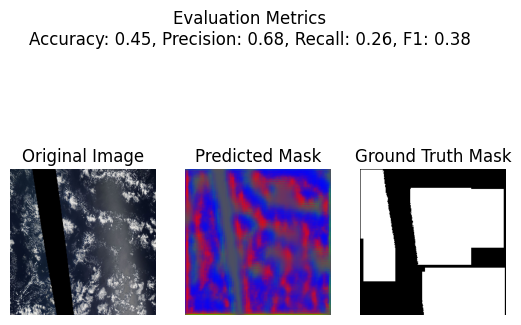

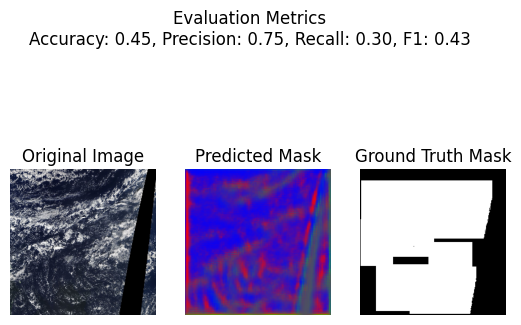

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ground_truth_masks=preprocessed_test_masks_array
#plt.imshow(predicted_mask[1] )
# Iterate over the predicted masks and ground truth masks
for i in range(len(predicted_masks)):
    predicted_mask = predicted_masks[i]
    ground_truth_mask = ground_truth_masks[i]
    #plt.imshow(predicted_mask )

    # Convert the masks to binary (0s and 1s)
    binary_predicted_mask = (predicted_mask > 0.5).astype(int)
    binary_ground_truth_mask = (ground_truth_mask > 0.5).astype(int)

    # Calculate evaluation metrics
    accuracy = accuracy_score(binary_ground_truth_mask.flatten(), binary_predicted_mask.flatten())
    precision = precision_score(binary_ground_truth_mask.flatten(), binary_predicted_mask.flatten())
    recall = recall_score(binary_ground_truth_mask.flatten(), binary_predicted_mask.flatten())
    f1 = f1_score(binary_ground_truth_mask.flatten(), binary_predicted_mask.flatten())

    # Visualize the predicted mask and ground truth mask
    plt.figure()
    plt.subplot(1, 3, 1)
    plt.axis('off')
    plt.imshow(preprocessed_test_images_array[i],cmap ='gray')
    plt.title('Original Image')
    plt.subplot(1, 3, 2)
    plt.axis('off')
    plt.imshow(predicted_mask, cmap='gray')
    plt.title('Predicted Mask')
    plt.subplot(1, 3, 3)
    plt.axis('off')
    plt.imshow(ground_truth_mask)
    plt.title('Ground Truth Mask')
    plt.suptitle(f'Evaluation Metrics\nAccuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}')
    plt.show()

END